# intraCorr
intraCorr es un paquete de Python que utiliza Pandas, Numpy, Scipy y SkLearn, fue creado con el propósito de ayudarnos a determinar la correlación entre sujetos para los cuales tenemos observaciones repetidas de 2 variables. 
Existen casos en los cuales ANOVA no puede ser utilizado; por ejemplo, si medimos la altura y peso de varias personas en diferentes épocas y no se tiene el mismo número de observaciones, entonces ANOVA no puede ser utilizado dado que ANOVA requiere tener la misma cantidad de observaciones para cada individuo.

Note que existen paquetes en R que pueden calcular esta correlación, sin embargo no se encontró un paquete análogo en Python.

En este tutorial corto utlizamos los datos de Bland & Altman 1995, quienes introdujeron la forma de hacer estos cálculos en boiestadística

## Referencias:
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5383908/pdf/fpsyg-08-00456.pdf
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2548822/pdf/bmj00580-0040.pdf
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2549010/pdf/bmj00583-0027.pdf
* https://rdrr.io/cran/rmcorr/src/R/rmcorr.R

## Autores:
* José Nandez
* Erika Muñoz

## Llamar intraCorr
Primero asegúrese de que tiene instalado intracorr en su hambiente virtual utilizando `pip install intraCorr`

In [30]:
#pip install intraCorr;

una vez instalado podemos llamar intraCorr

In [4]:
from intraCorr import intraCorr

## Cargamos los datos adjuntos

In [6]:
dataTest = intraCorr.bland_altman_1995()

In [10]:
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
PaCO2      47 non-null float64
Subject    47 non-null int64
pH         47 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1.2 KB


In [13]:
dataTest.head(8)

,PaCO2,Subject,pH
0,3.9700,1,6.6800
1,4.1200,1,6.5300
2,4.0900,1,6.4300
3,3.9700,1,6.3300
4,5.2700,2,6.8500
5,5.3700,2,7.0600
6,5.4100,2,7.1300
7,5.4400,2,7.1700


### Utilice `print_results` para imprimir los datos
Este método permite imprimir la tabla de regresión ANOVA

In [15]:
intraCorr('Subject','PaCO2','pH',dataTest).print_result()

          DoF  SumOfSq    MSE  F_value  p_value
Subject     7   2.9661 0.4237  48.2467  <0.0001
PaCO2       1   0.1153 0.1153  13.1313   0.0008
Residual   38   0.3337 0.0088      nan     None
Total      46   3.3139 0.0720      nan     None


## Imprimir las variables utilizadas
intraCorr contiene un método `plot` que muestra las tendencias. Note que se requiere utilzar `%matplotlib inline` en una celda previa.

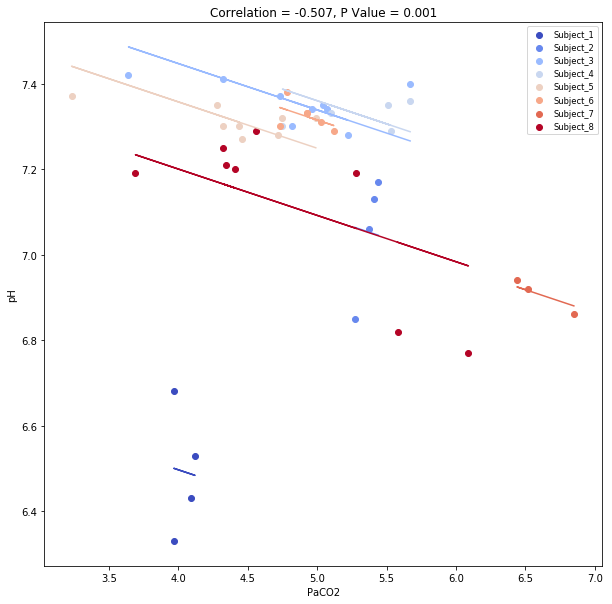

In [18]:
intraCorr('Subject','PaCO2','pH',dataTest).plot(prefix='Subject')

## Calcule la correlación y el valor de p

In [27]:
print('Correlación = {0} con valor de p = {1}'.format(*intraCorr('Subject','PaCO2','pH',dataTest).fit()))

Correlación = -0.5067697422330684 con valor de p = 0.0008471081091287977


## Guarde el resultado

In [28]:
corr, valor_p = intraCorr('Subject','PaCO2','pH',dataTest).fit()

In [29]:
corr, p_valor #p-valor o valor_p ???

(-0.5067697422330684, 0.0008471081091287977)

## Conclusion
Este método puede ser utilizado para iterar sobre todas las variables y construir una matriz de correlaciones. Note que intraCorr maneja los datos utlizando Pandas.